# Oversampling-Undersampling for Imbalanced dataset

#### What is imbalanced dataset?
A dataset having huge difference between class distributions. For example, class A having 1,000 instances while class B having 10,000 instances

#### What is data oversampling?
Increasing the number of instances of minority class

#### What is data undersampling?
Decreasing the number of instances of majority class

#### Why perform data resampling?
Most of the classification algorithms require data with equal class distribution. If imbalanced dataset is provided, they tend to give poor performance.

these techniques can be applied when dealing with imbalanced text classification problems, such as spam detection or sentiment analysis.

In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer #convert the text into feature vector 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [104]:
df= pd.read_csv('/kaggle/input/twitter/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [106]:
df.shape

(31962, 3)

## Exploring Dataset

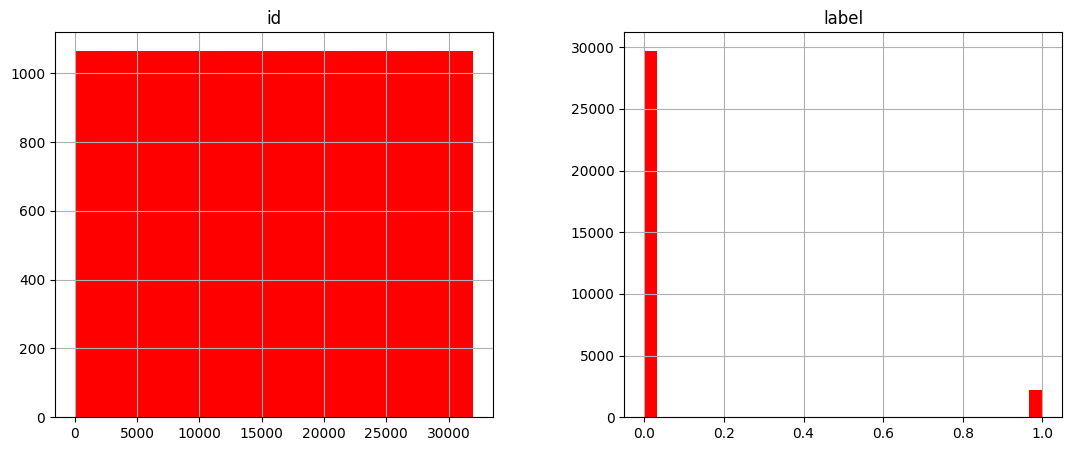

In [107]:
df.hist(bins = 30, figsize = (13,5), color = 'r')
plt.show()

## Data cleaning

In [109]:
features = df.drop(columns='label', axis=1)
targets = df['label']

In [110]:
import spacy
nlp = spacy.load('en_core_web_sm')
def data_clean(data):
    # Lowercase
    data = data.lower() 
    # Remove punctuation and digits
    data = re.sub(r'[^a-zA-Z\s]', '', data) 
    # Lemmatization
    doc = nlp(data)
    data = ' '.join([token.lemma_ for token in doc])
    return data

In [111]:
features['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [112]:
features['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [113]:
features['tweet'] =features['tweet'].apply(data_clean)

In [114]:
features['tweet'].head(1)

0      user when a father be dysfunctional and be s...
Name: tweet, dtype: object

In [115]:
data=features['tweet'].values

## TF-IDF vector

In [116]:
Vector = TfidfVectorizer()
Vector.fit(data)
data = Vector.transform(data)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, stratify=targets, random_state=42)

# Model: Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier()
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# Predictions on the training set
predTrain_rf = rf_classifier.predict(X_train)

In [119]:
# Calculate accuracy on the training set
accuracyTrain_rf = accuracy_score(predTrain_rf, y_train)
print('Accuracy score for the training data: ', accuracyTrain_rf)

Accuracy score for the training data:  0.9998435605616176


In [120]:
# Predictions on the test set
predTest_rf = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracyTest_rf = accuracy_score(predTest_rf, y_test)
print('Accuracy score for the test data: ', accuracyTest_rf)

Accuracy score for the test data:  0.9618332551227905


# Undersampling and Oversampling 


## Undersampling

In [121]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
newdata, newtargets = undersample.fit_resample(data, targets)

In [122]:
from collections import Counter
print(Counter(newtargets))

Counter({0: 2242, 1: 2242})


In [123]:
print(len(newtargets))

4484


In [124]:
X_train, X_test, y_train, y_test = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets, random_state=42)

In [125]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predTrain_rf = rf_classifier.predict(X_train)

In [126]:
# Calculate accuracy on the training set
accuracyTrain_rf = accuracy_score(predTrain_rf, y_train)
print('Accuracy score for the training data: ', accuracyTrain_rf)

Accuracy score for the training data:  1.0


In [127]:
# Predictions on the test set
predTest_rf = rf_classifier.predict(X_test)
# Calculate accuracy on the test set
accuracyTest_rf = accuracy_score(predTest_rf, y_test)
print('Accuracy score for the test data: ', accuracyTest_rf)

Accuracy score for the test data:  0.8272017837235228


## Oversampling

In [128]:
# define oversample strategy
oversample = RandomOverSampler(sampling_strategy='minority')
newdata, newtargets = oversample.fit_resample(data, targets)

In [129]:
from collections import Counter
print(Counter(newtargets))

Counter({0: 29720, 1: 29720})


In [130]:
X_train, X_test, y_train, y_test = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets, random_state=42)

In [131]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predTrain_rf = rf_classifier.predict(X_train)

In [132]:
# Calculate accuracy on the training set
accuracyTrain_rf = accuracy_score(predTrain_rf, y_train)
print('Accuracy score for the training data: ', accuracyTrain_rf)

Accuracy score for the training data:  0.9999579407806191


In [133]:
# Predictions on the test set
predTest_rf = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracyTest_rf = accuracy_score(predTest_rf, y_test)
print('Accuracy score for the test data: ', accuracyTest_rf)

Accuracy score for the test data:  0.9977288021534321


## Comparison

In [135]:
import pandas as pd
results = {
    'Scenario': ['Original Data', 'Random Undersampling', 'Random Oversampling'],
    'Train Accuracy': [0.9998, 1.0, 0.9999],
    'Test Accuracy': [0.9618, 0.827, 0.9979]
}
results_df = pd.DataFrame(results)
print(results_df)

               Scenario  Train Accuracy  Test Accuracy
0         Original Data          0.9998         0.9618
1  Random Undersampling          1.0000         0.8270
2   Random Oversampling          0.9999         0.9979
